In [1]:
from PIL import Image
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import files
imported = files.upload()
print("Imported files:")
print(*imported, sep = "/n")

Saving yalefaces.zip to yalefaces.zip
Imported files:
yalefaces.zip


In [3]:
import zipfile
path = '/content/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

# Pré-processamento

In [4]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject14.rightlight.gif', 'subject11.sleepy.gif', 'subject09.sleepy.gif', 'subject08.sleepy.gif', 'subject09.leftlight.gif', 'subject10.glasses.gif', 'subject07.surprised.gif', 'subject02.surprised.gif', 'subject01.rightlight.gif', 'subject10.rightlight.gif', 'subject07.rightlight.gif', 'subject12.surprised.gif', 'subject04.sad.gif', 'subject01.sleepy.gif', 'subject04.centerlight.gif', 'subject06.glasses.gif', 'subject02.noglasses.gif', 'subject13.leftlight.gif', 'subject15.normal.gif', 'subject04.glasses.gif', 'subject10.happy.gif', 'subject11.wink.gif', 'subject03.rightlight.gif', 'subject03.sad.gif', 'subject08.wink.gif', 'subject13.happy.gif', 'subject06.noglasses.gif', 'subject15.noglasses.gif', 'subject15.sleepy.gif', 'subject15.wink.gif', 'subject08.surprised.gif', 'subject05.rightlight.gif', 'subject07.sleepy.gif', 'subject08.centerlight.gif', 'subject15.glasses.gif', 'subject01.leftlight.gif', 'subject11.centerlight.gif', 'subject13.surprised.gif', 'subject12.glasses.gif', 

In [5]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for path in paths:
    imagem = Image.open(path).convert('L')
    imagem_np = np.array(imagem, 'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    ids.append(id)
    faces.append(imagem_np)
    
  return np.array(ids), faces

In [6]:
ids, faces = get_image_data()

In [8]:
ids

array([14, 11,  9,  8,  9, 10,  7,  2,  1, 10,  7, 12,  4,  1,  4,  6,  2,
       13, 15,  4, 10, 11,  3,  3,  8, 13,  6, 15, 15, 15,  8,  5,  7,  8,
       15,  1, 11, 13, 12,  5,  7,  1,  2, 15,  2,  7,  6,  6,  7,  9,  5,
       10,  3, 14,  4,  1,  1, 11, 12,  5, 14,  5,  7, 14,  1,  2, 10, 14,
       11,  1,  4, 14,  9,  1,  6, 15,  4,  2,  3,  3, 13,  2, 14,  8,  6,
       15,  6,  9,  5, 11,  8, 10, 13, 13,  2,  2,  6,  4,  8,  7,  7,  4,
       10, 15,  5,  4,  9,  8,  6,  9, 14,  9, 12, 10, 12,  3,  3,  3,  5,
       12,  5,  9,  3, 11, 13, 12, 11, 12, 13, 14, 11, 13,  8, 12, 10])

In [9]:
len(ids)

135

In [10]:
len(faces)

135

In [11]:
faces[0].shape

(243, 320)

# Treinamento do classificador LBPH

In [12]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

# Reconhecimento de Faces

In [13]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [14]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

In [15]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem, 'uint8')
imagem_np

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)

In [16]:
imagem_np.shape

(243, 320)

In [17]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(10, 6.384336446373091)

In [18]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

10

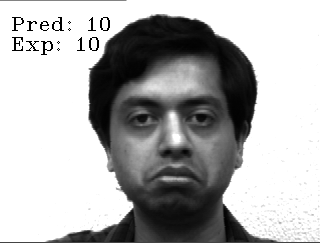

In [19]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(imagem_np)

# Avaliação


In [20]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []
for path in paths:
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem, 'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

In [21]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [22]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [23]:
type(previsoes), type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [24]:
previsoes

array([10,  1,  7,  5,  4,  1,  9,  9, 13, 15, 14, 13,  5,  9, 11,  8,  5,
       11,  4,  4, 12,  3,  7, 12,  7, 14,  6, 14,  4,  9])

In [25]:
saidas_esperadas

array([10,  1,  9,  5,  2,  1,  9,  7, 13, 15, 14, 13,  2,  3, 11,  8,  5,
       11,  4, 10, 12,  3,  7, 12, 15, 14,  6,  6,  8,  4])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

0.6666666666666666

In [27]:
len(previsoes)

30

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

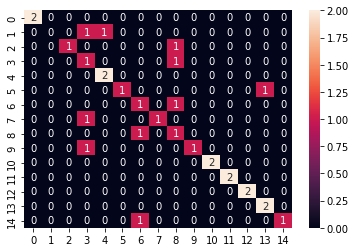

In [30]:
import seaborn
seaborn.heatmap(cm, annot=True);

# Parâmetros do Classificador

Com uso dos parâmetros radius = 4, neighbors = 14, grid_x = 9, grid_y = 9 no método cv2.face.LBPHFaceRecognizer_create() do classificador resultará 
numa acurácia de 70%